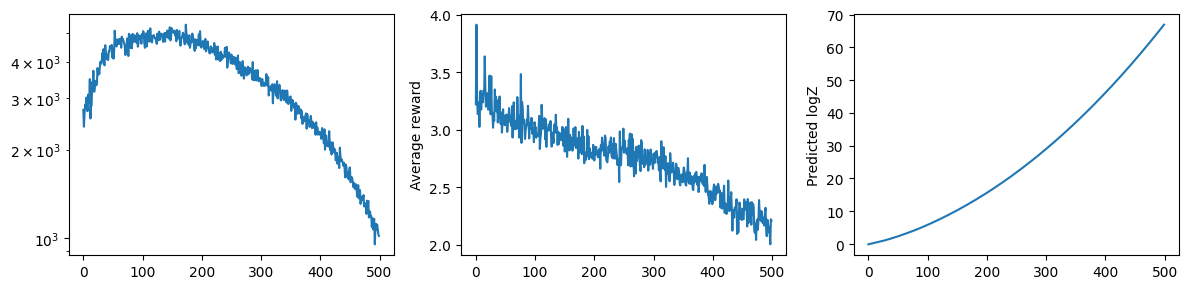

In [13]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator
cfg.log_dir = 'vanilla3'
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(1, 3, figsize=(4*3,3))
ax[0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0].set_yscale('log')
ax[1].set_ylabel('TB loss')
ax[1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[1].set_ylabel('Average reward')
ax[2].plot([i.value for i in ea.Scalars('train_logZ')])
ax[2].set_ylabel('Predicted logZ')
pp.tight_layout()

In [14]:
"""import importlib
import gflownet.utils.sqlite_log as sqll
importlib.reload(sqll)
results = sqll.read_all_results('D:/Dokumenter/Skole/Prosjektoppgave/prosjektKopi/pom_cpu-model/vanilla/train')
results"""

"import importlib\nimport gflownet.utils.sqlite_log as sqll\nimportlib.reload(sqll)\nresults = sqll.read_all_results('D:/Dokumenter/Skole/Prosjektoppgave/prosjektKopi/pom_cpu-model/vanilla/train')\nresults"

In [16]:
import sqlite3
import os

path = './vanilla3/train/'
db_files = [f for f in os.listdir(path) if f.startswith("generated_objs") and f.endswith(".db")]

for db_file in db_files:
    try:
        with sqlite3.connect(f"file:{path}/{db_file}?mode=ro", uri=True) as conn:
            conn.execute("SELECT 1")  # Test connection
        print(f"{db_file} is accessible.")
    except sqlite3.OperationalError as e:
        print(f"Error with {db_file}: {e}")

generated_objs_0.db is accessible.


In [17]:
import sqlite3
import pandas as pd

# Define the path to the accessible database
db_path = './vanilla3/train/generated_objs_0.db'

# Attempt to read from the only existing database file
try:
    # Connect to the existing database and read the results table
    conn = sqlite3.connect(f"file:{db_path}?mode=ro", uri=True)
    results = pd.read_sql_query("SELECT * FROM results", conn)
    conn.close()
    print(results)
except sqlite3.OperationalError as e:
    print(f"Error accessing the database: {e}")

                                                     smi         r      fr_0  \
0      FC12ON3P456=NC78[SH]9=C%10C%11S1%12%13=C=[PH]1...  2.867783  2.867783   
1      N=S123NP4N5N6C51S15(OOF)=[S]62OOS32([N]1)(O5)S...  3.061492  3.061492   
2      O=[PH]12=[SH]34[SH2]56C#[SH]7[SH]89%10OS%11%12...  2.557587  2.557587   
3      N1=P234=S567C8N9P%10%11#P5%12%13N5C%14(C18%12)...  2.233224  2.233224   
4                                                   P[S]  4.057779  4.057779   
...                                                  ...       ...       ...   
31995  C12C34[SH]56=[SH]78P9[SH]3%10=P13%11%12C71[PH]...  0.754797  0.754797   
31996  O1S2345C67S89#P%10[SH]6%11%12C86OP78%13%14%15[...  1.390660  1.390660   
31997  S=P12C34P5S6=[PH]7P[PH]89(S)=S1%10%11[C]=C%10[...  2.772320  2.772320   
31998  CS12N(F)[PH]345[PH]6P37=[PH]143[SH]1[S]4P8[C]=...  2.924181  2.924180   
31999  N1=P2345P6[PH]178=[S]S19%10%11[P]2=S612P916[SH...  1.963295  1.963295   

       ci_beta  
0          1.0  
1    

In [18]:
results

,smi,r,fr_0,ci_beta
0,FC12ON3P456=NC78[SH]9=C%10C%11S1%12%13=C=[PH]1...,2.867783,2.867783,1.0
1,N=S123NP4N5N6C51S15(OOF)=[S]62OOS32([N]1)(O5)S...,3.061492,3.061492,1.0
2,O=[PH]12=[SH]34[SH2]56C#[SH]7[SH]89%10OS%11%12...,2.557587,2.557587,1.0
3,N1=P234=S567C8N9P%10%11#P5%12%13N5C%14(C18%12)...,2.233224,2.233224,1.0
4,P[S],4.057779,4.057779,1.0
...,...,...,...,...
31995,C12C34[SH]56=[SH]78P9[SH]3%10=P13%11%12C71[PH]...,0.754797,0.754797,1.0
31996,O1S2345C67S89#P%10[SH]6%11%12C86OP78%13%14%15[...,1.390660,1.390660,1.0
31997,S=P12C34P5S6=[PH]7P[PH]89(S)=S1%10%11[C]=C%10[...,2.772320,2.772320,1.0
31998,CS12N(F)[PH]345[PH]6P37=[PH]143[SH]1[S]4P8[C]=...,2.924181,2.924180,1.0


In [19]:
df = pd.read_csv("data.csv")
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [20]:
common_smiles = set(df["nonStereoSMILES"]).intersection(results["smi"])
len(common_smiles)

5

In [21]:
# List of SMILES strings to filter by
smiles_list = list(common_smiles)

# Filter DataFrame rows where 'SMILES' column contains values from smiles_list
filtered_df = df[df['nonStereoSMILES'].isin(smiles_list)]

filtered_df

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
40,CS,savory;garlic;vegetable;cabbage;sulfurous;oily...,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1525,SCS,pungent;cooked;meaty,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2166,CNC,cheesy;ripe;fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3406,CO,alcoholic,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3408,O,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:


# Filter DataFrame rows where 'SMILES' column contains values from smiles_list
filtered_df2 = results[results['smi'].isin(smiles_list)]

filtered_df2

,smi,r,fr_0,ci_beta
5,O,1.000000,1.000000,1.0
60,CS,4.466364,4.466364,1.0
102,O,1.000000,1.000000,1.0
103,O,1.000000,1.000000,1.0
378,O,1.000000,1.000000,1.0
414,CS,4.466364,4.466364,1.0
462,O,1.000000,1.000000,1.0
463,SCS,3.723684,3.723684,1.0
555,CNC,11.344509,11.344510,1.0
585,O,1.000000,1.000000,1.0


In [23]:
from rdkit import Chem

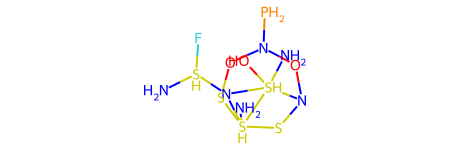

In [24]:
mol = Chem.MolFromSmiles("N[SH](F)N1[SH]23(N)SON(P)ON(S2)[SH]13(N)O")
mol

In [25]:
from pom_models.functions import fragance_propabilities_from_smiles
v="[H]C(=O)C1=CC(OC)=C(O)C=C1"
probabilities=fragance_propabilities_from_smiles("N#S12OC#[SH](O1)S2")
mol_prob = fragance_propabilities_from_smiles(v)[0]
max_probs = sorted(mol_prob, reverse=True)[:5] 
mask = list(map(lambda x:  1 if x>max_probs[-1] else  0, mol_prob))
import numpy as np
reward_array = np.array(mask) * 10
float(sum((probabilities * reward_array)[0]))

c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = t

3.0669691041111946

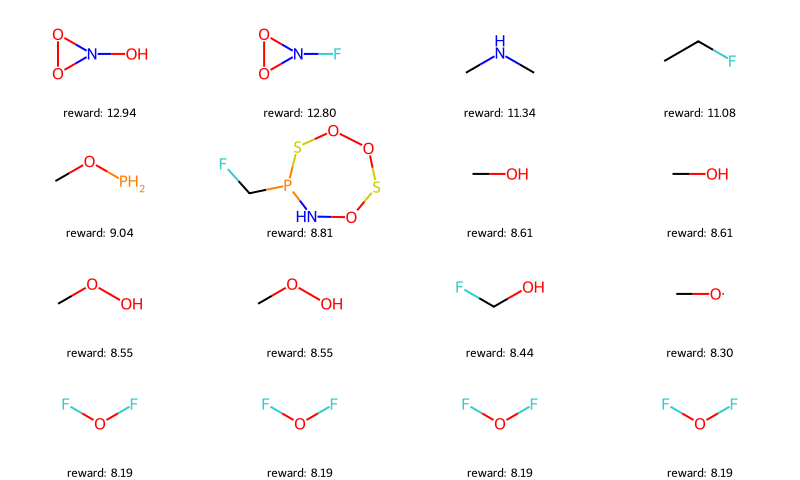

In [26]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
top_k = np.argsort(results['r'])[-16:][::-1]
rewards = results['r'][top_k]
mols = [Chem.MolFromSmiles(i) for i in results['smi'][top_k]]
MolsToGridImage(mols[:16], molsPerRow=4, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards])

In [27]:
results['smi'][top_k]


2091            On1oo1
7133            Fn1oo1
555                CNC
1456               CCF
118                COP
1520    FCp1[nH]osoos1
1201                CO
616                 CO
1545               COO
1476               COO
1006               OCF
1305              C[O]
5108               FOF
2823               FOF
2620               FOF
450                FOF
Name: smi, dtype: object

In [28]:
def num_atoms(s):
    m = Chem.MolFromSmiles(s)
    atoms=m.GetAtoms()
    return len(atoms)


df['mol_size'] = df['nonStereoSMILES'].apply(num_atoms)
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody,mol_size
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,9


<Axes: >

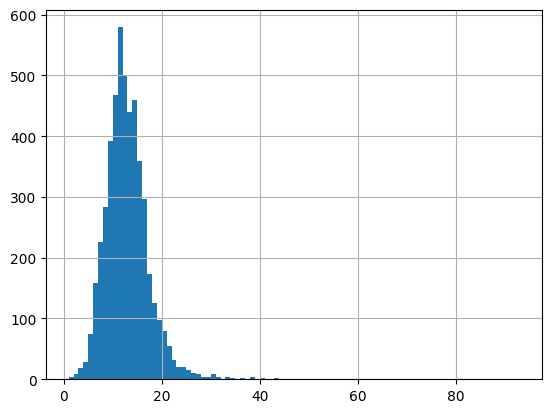

In [29]:
df['mol_size'].hist(bins=range(df['mol_size'].min(), df['mol_size'].max() + 2))

In [30]:
df['mol_size']

0        5
1        7
2       11
3        9
4        9
        ..
4978    24
4979    25
4980    26
4981    10
4982    17
Name: mol_size, Length: 4983, dtype: int64

calculate quantiles


In [31]:
# Calculate specific quantiles
q10 = df['mol_size'].quantile(0.025)  # 10th percentile
q25 = df['mol_size'].quantile(0.25)  # 25th percentile (1st quartile)
q50 = df['mol_size'].quantile(0.50)  # 50th percentile (median)
q75 = df['mol_size'].quantile(0.75)  # 75th percentile (3rd quartile)
q90 = df['mol_size'].quantile(0.975)  # 90th percentile
q95 = df['mol_size'].quantile(0.95)  # 90th percentile


print(f"2.5th percentile: {q10}")
print(f"25th percentile (Q1): {q25}")
print(f"50th percentile (Median): {q50}")
print(f"75th percentile (Q3): {q75}")
print(f"97.5th percentile: {q90}")
print(f"95th percentile: {q95}")



2.5th percentile: 5.0
25th percentile (Q1): 10.0
50th percentile (Median): 12.0
75th percentile (Q3): 15.0
97.5th percentile: 23.0
95th percentile: 20.0
